In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2706,ham,S now only i took tablets . Reaction morning o...,NaN,NaN,NaN
2921,ham,I've not sent it. He can send me.,NaN,NaN,NaN
1170,ham,"Yeah, we can probably swing by once my roommat...",NaN,NaN,NaN
1643,ham,U WILL SWITCH YOUR FONE ON DAMMIT!!,NaN,NaN,NaN
4923,ham,We can go 4 e normal pilates after our intro...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

**Steps for the Processing**


1.   Data Cleaning
2.   EDA(Exploratory Data Analysis)
3.   Text Preprocessing(Vectorization,Tokenization,Stemming)
4.   Model building
5.   Model evaluation
6.   Improvements
7.   Creating the website for the model
8.   Deployment



**1.Data Cleaning**

Tasks to be always done in data cleaning:



1.   Dealing with null values
2.   Dealing with duplicated values
3.   Dealing with irrelevant attributes



In [4]:

#gaining information about the dataset
#Unnamed: 2,Unnamed: 3,Unnamed: 4 have almost zero non-null values
#these columns can be removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#dropping the unnamed: 2,unnamed: 3,unnamed: 4
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [6]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

#printing the columns
columns = df.columns
print(columns)

Index(['target', 'text'], dtype='object')


In [7]:
#Performing label encoding
df = df.replace({'target':{'ham':0,'spam':1}})

In [8]:
df.sample(5)

,target,text
3961,1,You have been specially selected to receive a ...
3880,0,Can you plz tell me the ans. BSLVYL sent via f...
5339,0,You'd like that wouldn't you? Jerk!
4942,0,Check mail.i have mailed varma and kept copy t...
3671,0,"came to look at the flat, seems ok, in his 50..."


In [9]:
#checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#checking for duplicated values
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep='first')
print(df)

      target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5169 rows x 2 columns]


In [12]:
df.shape

(5169, 2)

**2.EDA(Exploratory Data Analysis)**

In [13]:
spam_counts = df.groupby('target').count()

values_1d = np.ravel(spam_counts.values)

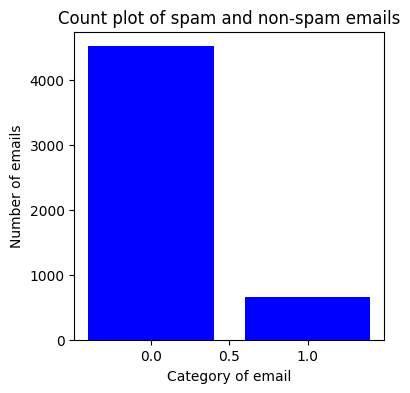

In [14]:
plt.figure(figsize=(4,4))
plt.bar(list(spam_counts.index),list(values_1d),color='blue',width=0.8)
plt.xlabel('Category of email')
plt.ylabel('Number of emails')
plt.title('Count plot of spam and non-spam emails')
plt.show()

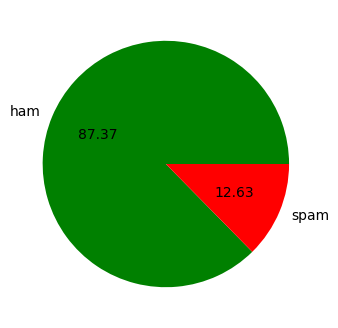

In [15]:
plt.figure(figsize=(4,4))
plt.pie(values_1d,labels=['ham','spam'],colors=['green','red'],autopct='%0.2f')
plt.show()

In [16]:
#fetching the number of characters from the text
df['num_characters'] = df['text'].apply(lambda x:len(x))

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
print(df)

      target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  
0                111         24  
1                 29          8  
2                155         37  
3                 49         13  
4                 61     

In [20]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
4937,0,No it was cancelled yeah baby! Well that sound...,129,27,2
587,0,\Pete can you please ring meive hardly gotany ...,55,11,1
3686,0,Great! I shoot big loads so get ready!,38,10,2
4011,0,Discussed with your mother ah?,30,6,1
5441,0,"By the way, make sure u get train to worc fore...",90,21,2


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


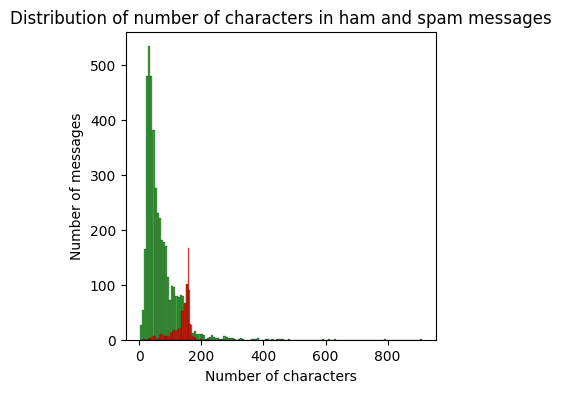

In [25]:
#plotting a histogram for the number of characters in the graph
plt.figure(figsize=(4,4))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.xlabel('Number of characters')
plt.ylabel('Number of messages')
plt.title('Distribution of number of characters in ham and spam messages')
plt.show()

By the above histogram, we can conclude that the emails with having more number of characters are tend to be a spam.

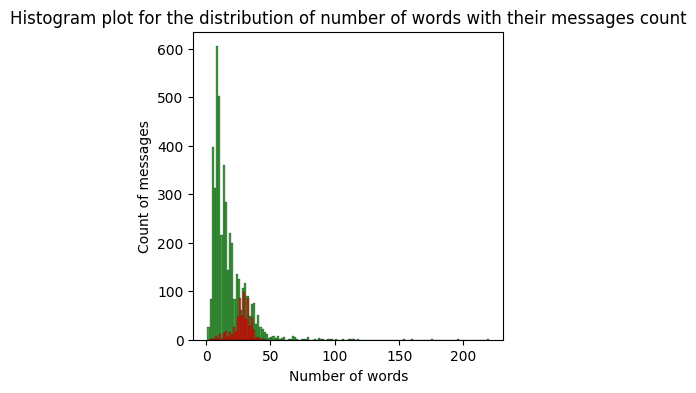

In [26]:
#plotting the histogram for the number of words
plt.figure(figsize=(4,4))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.xlabel('Number of words')
plt.ylabel('Count of messages')
plt.title('Histogram plot for the distribution of number of words with their messages count')
plt.show()

This histogram also concludes that having high number of words tends to be a spam.

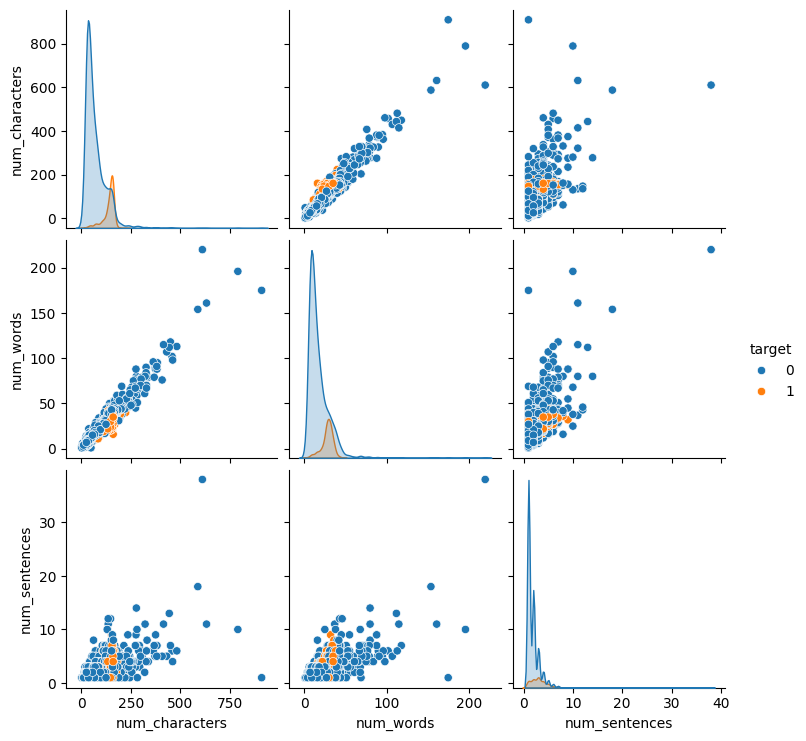

In [27]:
#pairplot->shows the relationship between various attributes
#hue parameter is used to color the data points based on their values
sns.pairplot(df,hue='target')

In [28]:
correlation = df.drop(columns='text',axis=1).corr()

<Axes: >

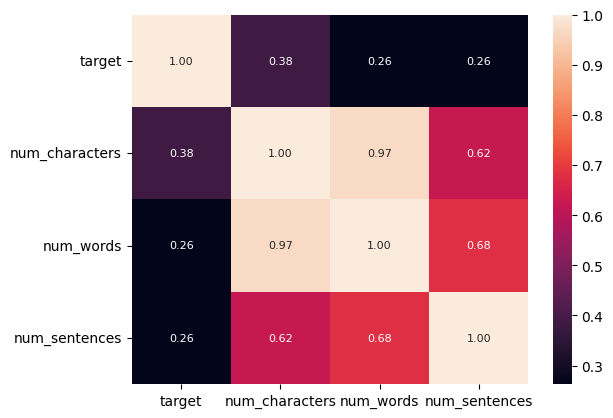

In [29]:
sns.heatmap(correlation,fmt='.2f',annot=True,annot_kws={'size':8},cbar=True)

By the above heatmap, we can see that there is multicollinearity in the dataset.

There is high correlation between the following attributes:


1.   num_characters and num_words(0.97)
2.   num_characters and num_sentences(0.62)
3.   num_words and num_sentences(0.68)

So, only one column should be taken for predicting model as there is high collinearity.
num_characters is having highest correlation with the tarhet attribute. So, it will be considered.




**Data Pre Processing**

1.   Converting the text to lowercase
2.   Tokenization
3.   Removing special characters
4.   Removing stop words and punctuation marks
5.   Stemming



In [30]:
def transform(text):

  #stop words
  stop_words = stopwords.words('english')

  #punctuation words
  punctuation_words = string.punctuation

  #creating the reference for PorterStemmer
  porter_stemmer = PorterStemmer()

  #converting text to lower case
  text = text.lower()

  #performing tokenization(creating a list of words out of the text)
  tokens = nltk.word_tokenize(text)

  #removing special characters
  y = []
  for i in tokens:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  #removing stop words and punctuation
  for i in text:
    if i not in stop_words and i not in punctuation_words:
      stemmed_word = porter_stemmer.stem(i)
      y.append(stemmed_word)

  text = y[:]
  return " ".join(text)

In [31]:
#processing the text
df['processed_text'] = df['text'].apply(transform)

In [32]:
df['processed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: processed_text, Length: 5169, dtype: object

In [33]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [34]:
spam_wc = wc.generate(df[df['target']==1]['processed_text'].str.cat(sep=" "))

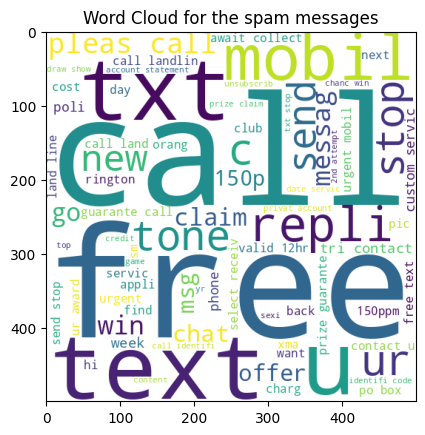

In [35]:
plt.figure()
plt.imshow(spam_wc)
plt.title('Word Cloud for the spam messages')
plt.show()

In [36]:
ham_text = wc.generate(df[df['target']==0]['processed_text'].str.cat(sep=" "))

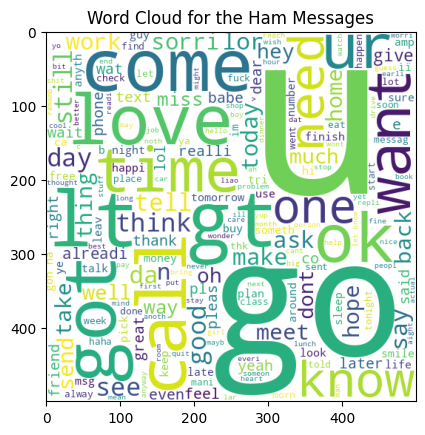

In [37]:
plt.figure()
plt.imshow(ham_text)
plt.title('Word Cloud for the Ham Messages')
plt.show()

In [38]:
spam_corpus = []
for sentence in df[df['target']==1]['processed_text']:
  for word in sentence.split():
    spam_corpus.append(word)

print(spam_corpus)
print(len(spam_corpus))

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

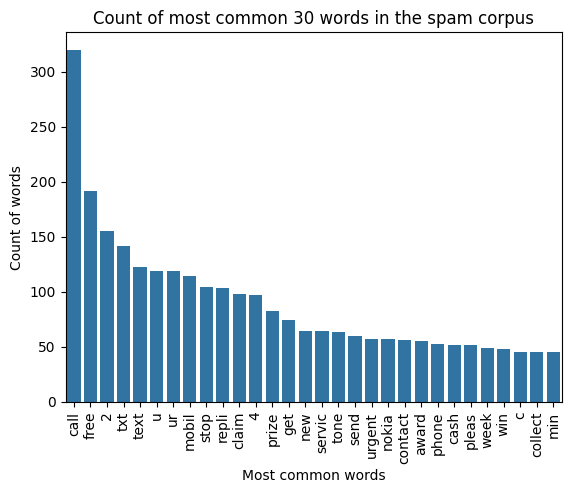

In [39]:
from collections import Counter
Counter(spam_corpus).most_common(30)

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xlabel('Most common words')
plt.ylabel('Count of words')
plt.title('Count of most common 30 words in the spam corpus')
plt.xticks(rotation='vertical')
plt.show()

In [40]:
ham_corpus = []
for sentence in df[df['target']==0]['processed_text']:
  for word in sentence.split():
    ham_corpus.append(word)

print(ham_corpus)
print(len(ham_corpus))

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 

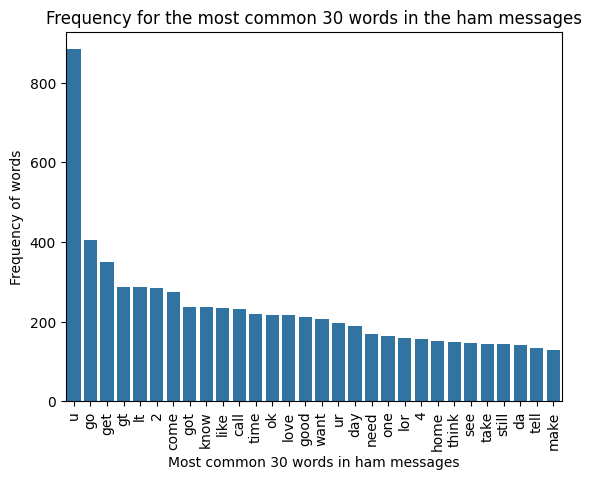

In [62]:
from collections import Counter
Counter(ham_corpus).most_common(30)
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xlabel('Most common 30 words in ham messages')
plt.ylabel('Frequency of words')
plt.title('Frequency for the most common 30 words in the ham messages')
plt.xticks(rotation='vertical')
plt.show()

**Building the Model**

best performance for the textual data => Naive Bayes Classifier
Also apply other models and compare

Also apply ensemble learning(Combination of various models)

In [63]:
#vectorizing the text
#Different algorithms available
#Bag of words, TF-IDF
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [64]:
#fit_transform return sparse array
#toarray() function converts it into a dense 2-d matrix
X = tfidf.fit_transform(df['processed_text']).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [65]:
Y = df['target'].values
print(Y)

[0 0 1 ... 0 0 0]


In [66]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

**Training the model**

In [67]:
#importing naive bayes classifiers for the code
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train,Y_train)
mnb.fit(X_train,Y_train)
bnb.fit(X_train,Y_train)

BernoulliNB()

In [48]:
y_pred1 = gnb.predict(X_test)
y_pred2 = mnb.predict(X_test)
y_pred3 = bnb.predict(X_test)

**Confusion Matrix**

[[TP,FP]
 [FN,TN]]

TP(True positive) => Actually positive and predicted as positive

FP(False positive) => Actually negative but predicted as positive

FN(False negative) => Actually positive but predicted as negative

TN(True negative) => Actually negative and predicted as negative

Accuracy score => (TP+TN)/(TP+FP+FN+TN)

Precision score => TP/(TP+FP)

In [69]:
#Printing the accuracy score, confusion matrix and the precision score for Gaussian Naive Bayes
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [70]:
#Printing the accuracy score, confusion matrix and the precision score for Multinomial Naive Bayes
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [71]:
#Printing the accuracy score, confusion matrix and the precision score for Bernoulli Naive Bayes
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


**Training Various models for comparison**

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [74]:
clfs = {
    'SVC' : svc,  #Support Vector Classifier => sklearn.svm
    'KN' : knc,   #K Nearest NeighBors Classifier => sklearn.neighbors
    'NB': mnb,    #Multinomial NB => sklearn.naive_bayes
    'DT': dtc,    #Decision Tree Classifier => sklearn.tree
    'LR': lrc,    #Logistic Regression => sklearn.linear_model
    'RF': rfc,    #Random Forest Classifier => sklearn.ensemble
    'AdaBoost': abc, #Ada Boost Classifier => sklearn.ensemble
    'BgC': bc,       #Bagging Classifier => sklearn.ensemble
    'ETC': etc,      #Extra Trees Classifier => sklearn.ensemble
    'GBDT':gbdt,     #Gradient Boosting Classifier => sklearn.ensemble
    'xgb':xgb        #XGBoostClassifier
}

In [75]:
def train_classifier(clf,X_train,X_test,Y_train,Y_test):
  clf.fit(X_train,Y_train)
  prediction = clf.predict(X_test)
  accuracy = accuracy_score(Y_test,prediction)
  precision = precision_score(Y_test,prediction)
  return accuracy,precision

In [56]:
train_classifier(svc,X_train,X_test,Y_train,Y_test)

(0.9729206963249516, 0.9741379310344828)

In [76]:
accuracy_scores = []
precision_scores = []
for name,classifier in clfs.items():
  accuracy,precision = train_classifier(classifier,X_train,X_test,Y_train,Y_test)
  accuracy_scores.append(accuracy)
  precision_scores.append(precision)

print(accuracy_scores)
print(precision_scores)

[0.9758220502901354, 0.9052224371373307, 0.9709864603481625, 0.9274661508704062, 0.9584139264990329, 0.9758220502901354, 0.960348162475822, 0.9584139264990329, 0.9748549323017408, 0.9468085106382979, 0.9671179883945842]
[0.9747899159663865, 1.0, 1.0, 0.8118811881188119, 0.9702970297029703, 0.9829059829059829, 0.9292035398230089, 0.8682170542635659, 0.9745762711864406, 0.9191919191919192, 0.9262295081967213]


In [58]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [59]:
performance_df
#best performing algorithm is Random Forest Classifier

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [60]:
#pd.melt converts the wide table into a long table
#id_vars specifies the column which we don't want to be changed
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [61]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


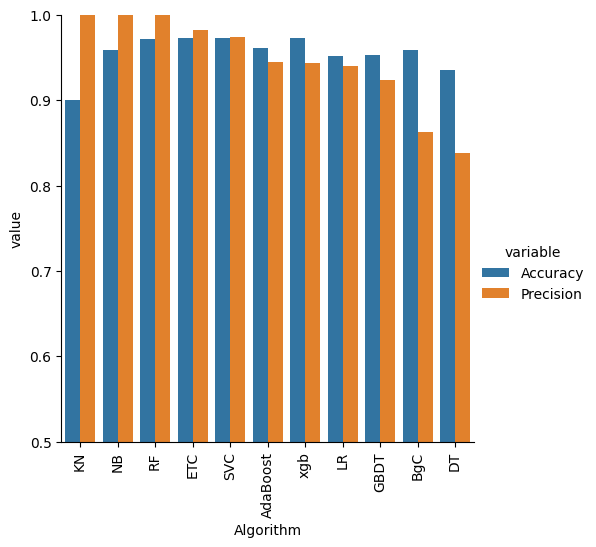

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

**Improving the model**

In [ ]:
#limiting the number of features to 3000(TfidfVectorizer takes a limit of number of features which can be limited)

In [77]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [78]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [80]:
#Accuracy of Naive Bayes is improved due to limit of max features
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


We can do scaling as well(MinMaxScaling will be required and not the StandardScaler because StandardScaler gives negative values which Naive Bayes do not accept)

We can append the number of characters, number of words and number of sentences in the feature vector and then use it but there is no such improvement.

In [81]:
#Using voting classifier of the best performing algorithms
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rf = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [82]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc),('rf', rf)],voting='soft')

In [84]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [85]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9915966386554622


We can also use Stacking Classifier where we assign weights to the output of each model whereas in Voting Classifier they are considered as equal.

In [87]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))